# Assignment5
21BCE9823 - KOMMAREDDY PRANAY NAGA VENKATA SUBBA REDDY

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

Loading the Dataset and Performing some data Preprocessing steps

In [11]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
print(df)

Saving Mall_Customers.csv to Mall_Customers.csv
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [13]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [18]:
df=df.drop([ 'CustomerID'] , axis =1 )

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [21]:
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

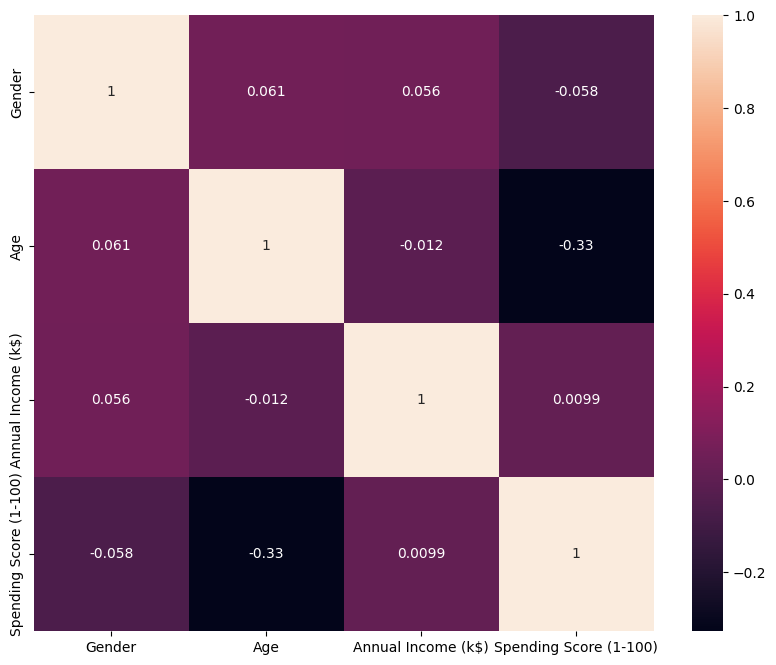

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot =True)

In [23]:
df.corr()['Spending Score (1-100)'].sort_values(ascending= False)

Spending Score (1-100)    1.000000
Annual Income (k$)        0.009903
Gender                   -0.058109
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64

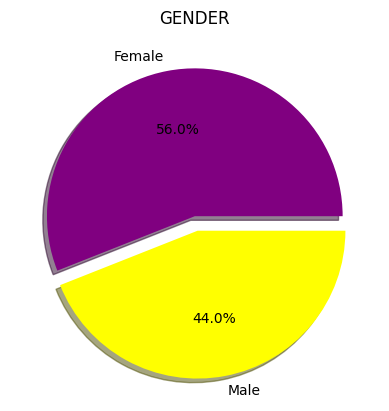

In [24]:
plt.pie(df.Gender.value_counts(),[0,0.1],labels = ['Female','Male'],autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow'],)
plt.title('GENDER')
plt.show()

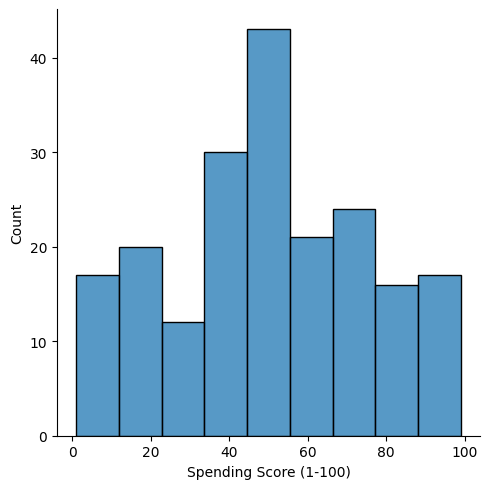

In [25]:
sns.displot(df['Spending Score (1-100)'])

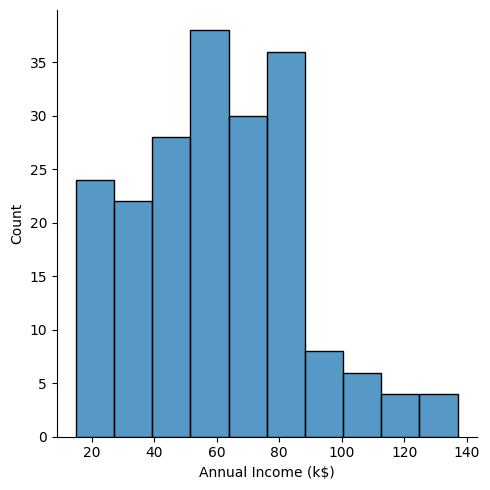

In [26]:
sns.displot(df['Annual Income (k$)'])

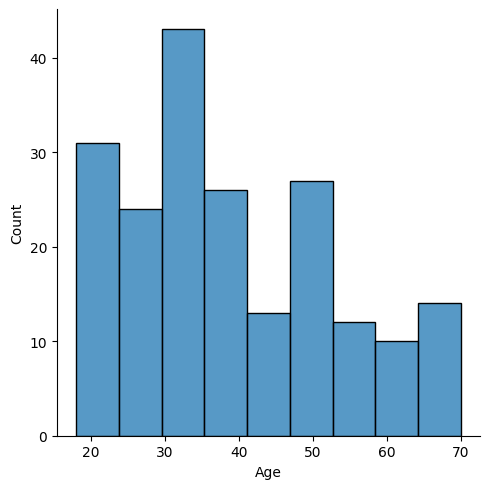

In [27]:
sns.displot(df['Age'])

<Axes: ylabel='Gender'>

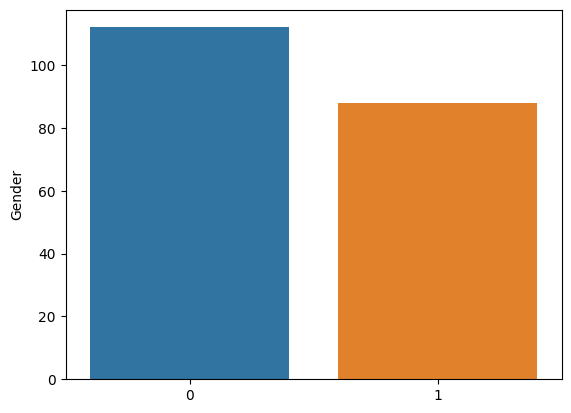

In [28]:
sns.barplot(x =df['Gender'].value_counts().index,y =df['Gender'].value_counts() )

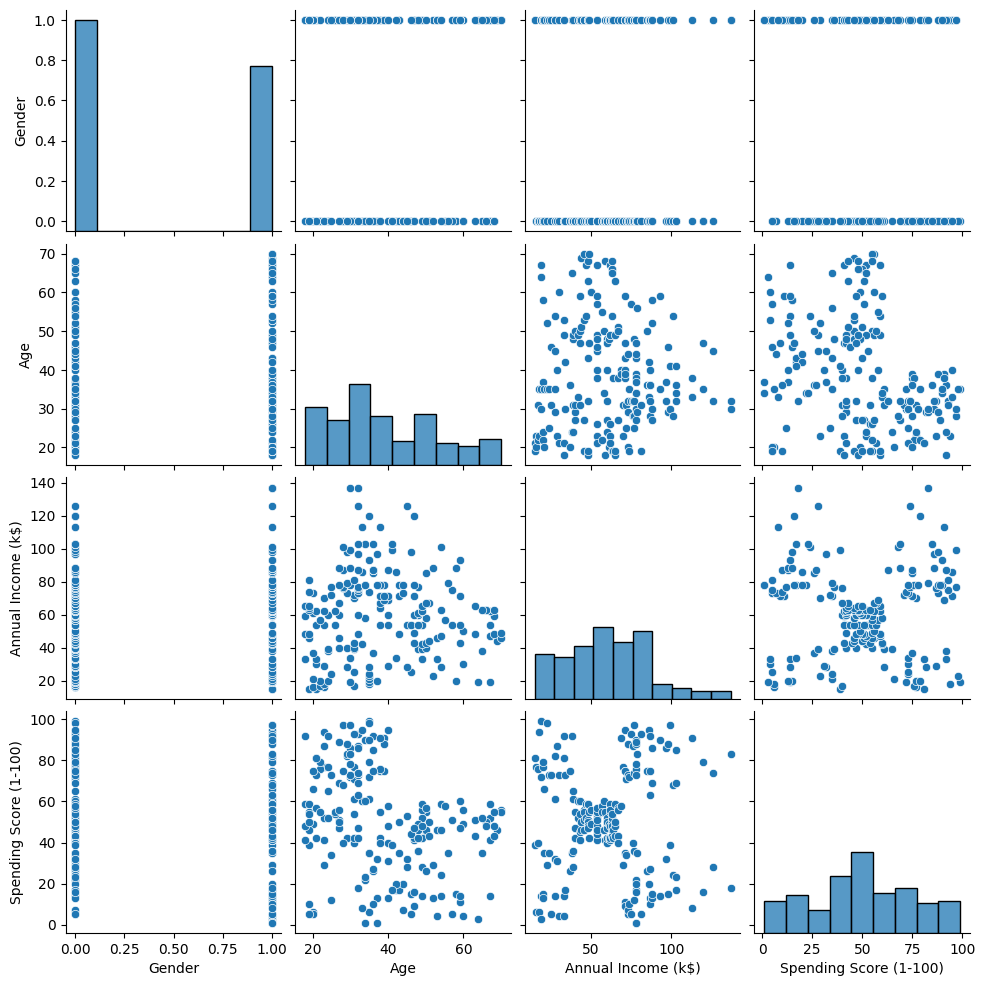

In [29]:
sns.pairplot(df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

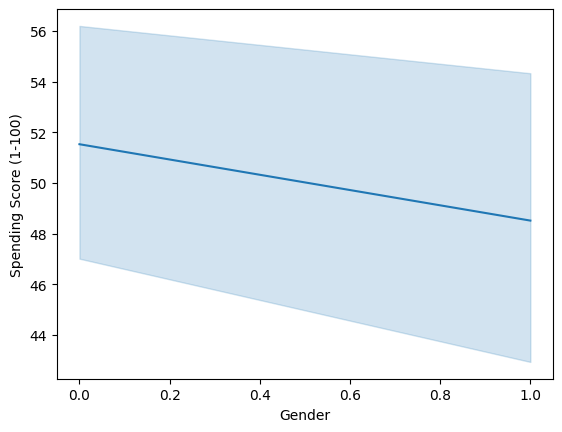

In [30]:
sns.lineplot( x = df['Gender' ] , y = df['Spending Score (1-100)'])

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

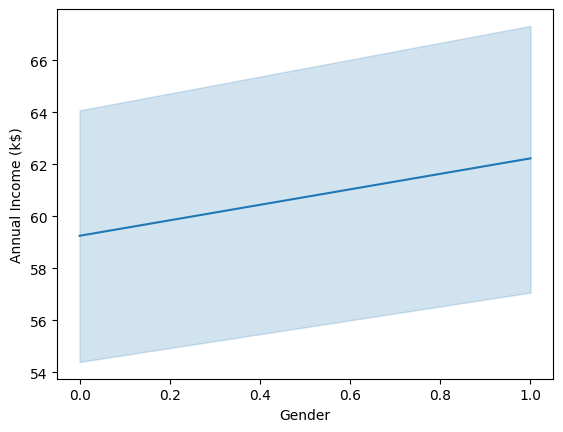

In [31]:
sns.lineplot( x = df['Gender' ] , y = df['Annual Income (k$)'])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

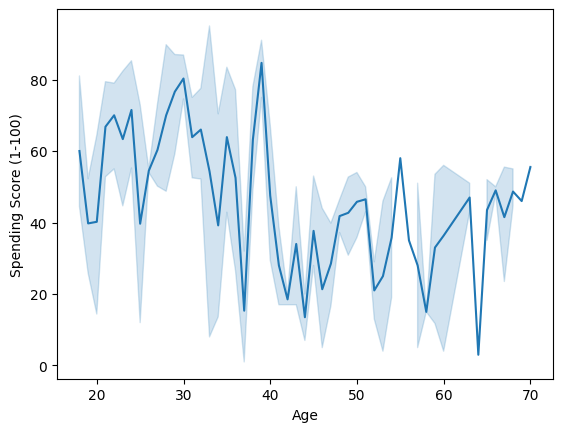

In [32]:
sns.lineplot( x = df['Age' ] , y = df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

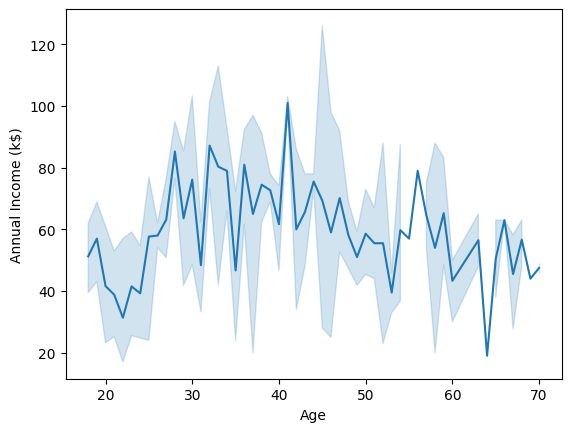

In [33]:
sns.lineplot(x=df['Age'] , y =  df['Annual Income (k$)'])

Clustering

In [34]:
from sklearn import cluster

error = []
for i in range(2,15):
  kmeans = cluster.KMeans(n_clusters = i)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

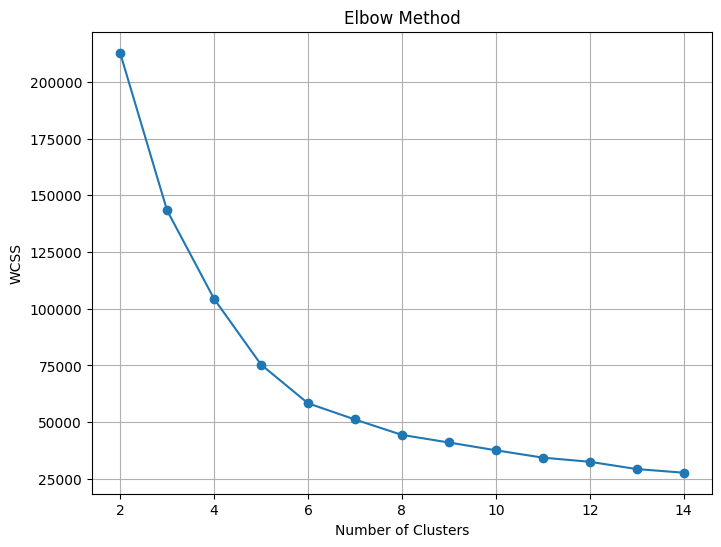

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(range(2,15), error, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [36]:
elbow_point = None
wcss=error
k_values = range(2,15)
for i in range(1, len(wcss)):
    if wcss[i - 1] - wcss[i] < 0.1 * wcss[0]:  # You can adjust the threshold as needed
        elbow_point = k_values[i - 1]
        break

print(f"The estimated elbow point is at {elbow_point} clusters.")

The estimated elbow point is at 5 clusters.


In [39]:
optimal_clusters = 5
kmeans = cluster.KMeans(n_clusters=optimal_clusters)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [40]:
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column to the DataFrame
df['Cluster_Labels'] = cluster_labels

In [41]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Labels
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,4
197,1,32,126,74,1
198,1,32,137,18,4


In [42]:
df['Cluster_Labels'].value_counts()

2    79
1    39
4    36
0    23
3    23
Name: Cluster_Labels, dtype: int64

In [43]:
for i in range(5):
  df1 = df[df['Cluster_Labels']== i]
  print(df1)
  print(" ")
  print(" ")

    Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster_Labels
0        1   19                  15                      39               0
2        0   20                  16                       6               0
4        0   31                  17                      40               0
6        0   35                  18                       6               0
8        1   64                  19                       3               0
10       1   67                  19                      14               0
12       0   58                  20                      15               0
14       1   37                  20                      13               0
16       0   35                  21                      35               0
18       1   52                  23                      29               0
20       1   35                  24                      35               0
22       0   46                  25                       5               0
24       0  

In [47]:
data = pd.read_csv('/content/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
